In [ ]:
Support Vector Regression

In [318]:
#load the libraries we have been using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

 

In [319]:
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

print('SHAPE OF THE DATA: {}\n'.format(X.shape))

#First 10 data samples
X.head(10)

SHAPE OF THE DATA: (442, 10)



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


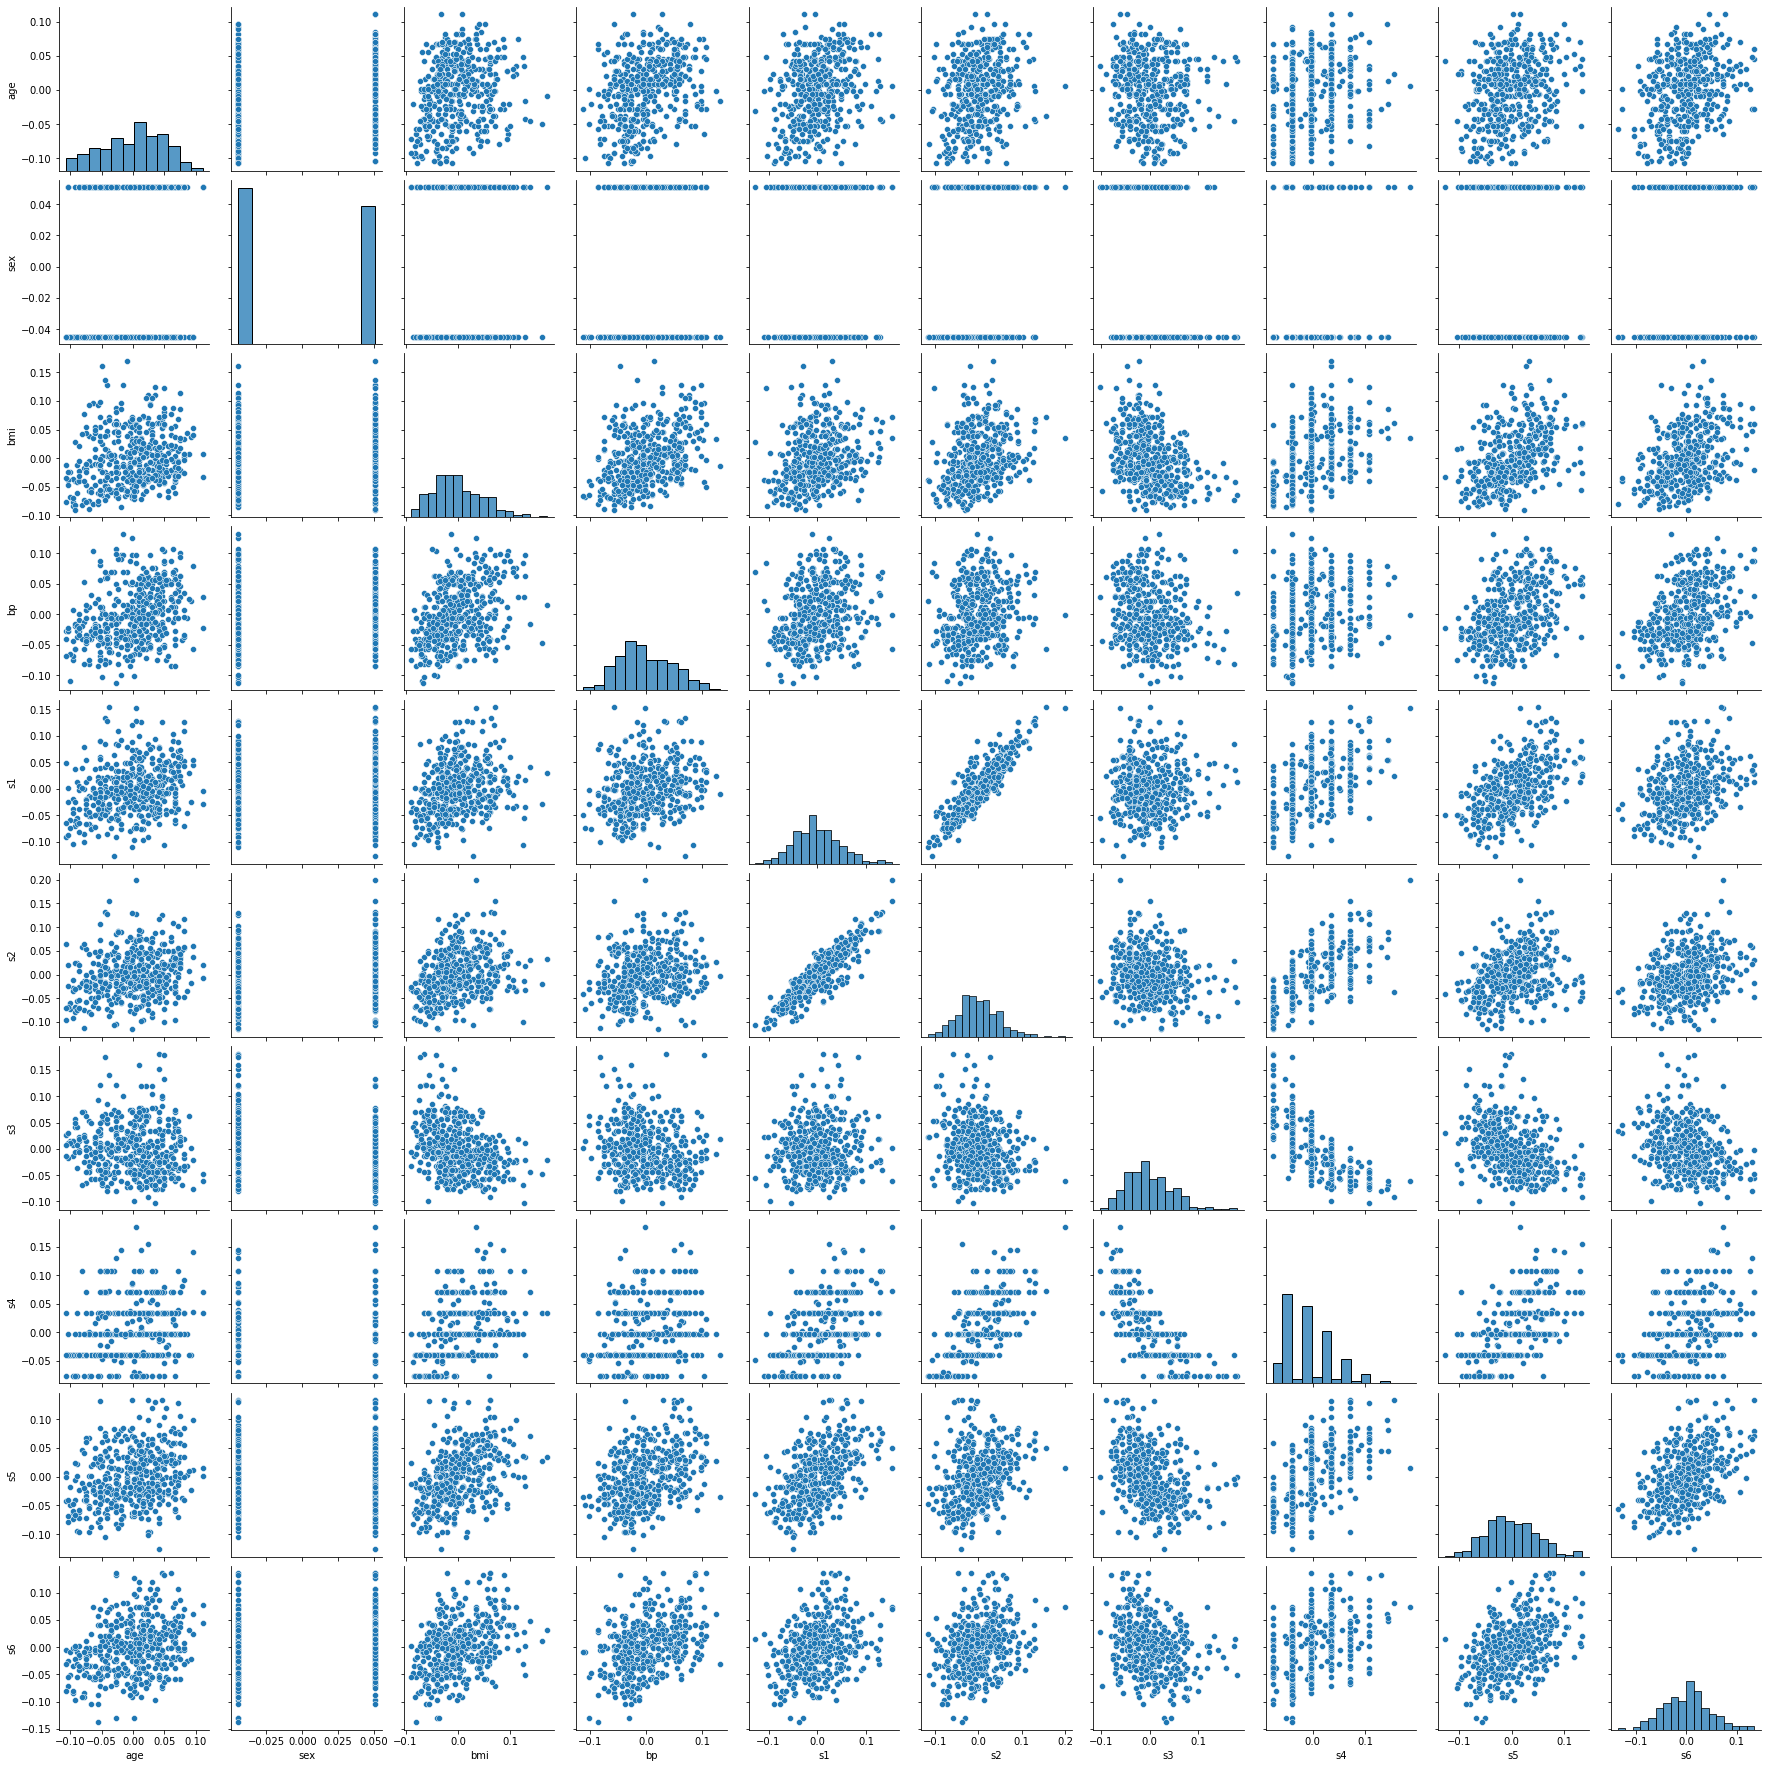

In [320]:
# Pair plot to seee data distribution
!pip install seaborn as sns
import seaborn as sns
aa=sns.pairplot(X)

<AxesSubplot:>

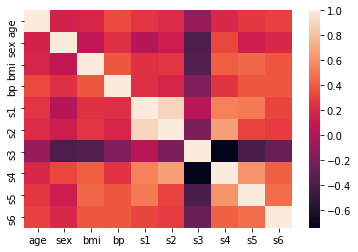

In [321]:
corr = X.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [253]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

print('Training sample size: {}'.format(y_train.size))
print('Test sample size: {}'.format(y_test.size))


Training sample size: 397
Test sample size: 45


In [339]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
 
regression_pipeline = Pipeline([('scaler',StandardScaler()),
                    ('svr',SVR(kernel='linear', degree=1, gamma=1, C=0.5))])


In [340]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
 
regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=0.5, degree=1, gamma=1, kernel='linear'))])

In [341]:
print('Best Intercept learnt: {}'.format(regression_pipeline['svr'].intercept_))
print('Best Coefficients learnt: {}'.format(regression_pipeline['svr'].coef_))

Best Intercept learnt: [148.57926289]
Best Coefficients learnt: [[  1.23440571 -10.42731626  19.14644661  14.37312781  -1.88647198
   -3.82743481  -9.81784344   5.89042598  17.12296546   6.52225539]]


In [342]:
from sklearn.metrics import r2_score

y_hat_test=regression_pipeline.predict(X_test)
r2 = r2_score(y_test, y_hat_test)

print('R-squared: {}'.format(r2)) #best R2 is 1 for perfect predictions

R-squared: 0.6466178068484664


In [343]:
#The comparison of real values vs predicted values

d1={'ground-truth':y_test.values}
d2={'predicted':y_hat_test}
d3={'difference':(y_test-y_hat_test).abs().values}
df = pd.concat([pd.DataFrame(d1),pd.DataFrame(d2),pd.DataFrame(d3)],axis=1)
df.sort_values(by=['difference'])

,ground-truth,predicted,difference
3,175.0,174.898210,0.101790
36,72.0,71.059861,0.940139
4,93.0,94.475576,1.475576
44,57.0,55.143455,1.856545
42,132.0,129.593549,2.406451
40,178.0,183.337867,5.337867
23,146.0,151.411790,5.411790
14,136.0,142.876267,6.876267
41,104.0,111.912272,7.912272
18,174.0,165.326197,8.673803


In [344]:
#Analysing the effects of features in prediction

!pip install shap
import shap
shap.initjs()

index=36
ex = shap.KernelExplainer(regression_pipeline.predict, X_test)
shap_values = ex.shap_values(X_test.iloc[index,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[index,:])

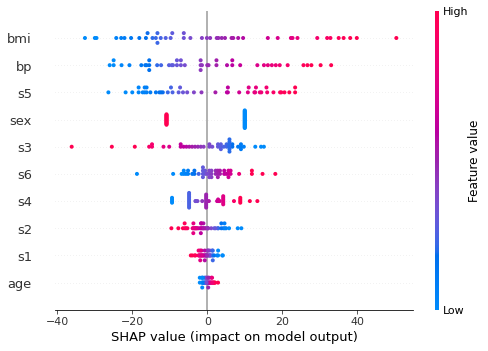

In [288]:
#Analysing the impacts of features on model output

shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

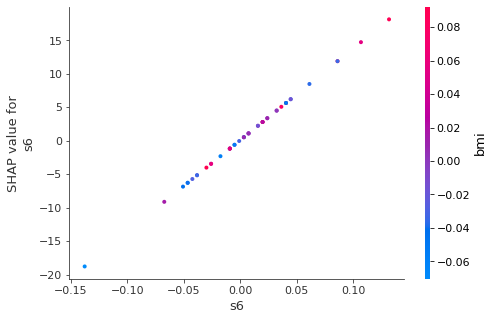

In [307]:
shap.dependence_plot("s6", shap_values, X_test,interaction_index="bmi")